Drew Grant

10/30/2020


**CONFERENCE POSTER SCRIPT!!!!!!**

This script uses feature extracted files of counting, breathing, and coughing from coswara. Only one file per speaker has been used in this dataset to preclude speaker classification, as the objective is sound event detection from. This script is intended to be used as a direct comparison to DL_CSD.ipynb.

https://colab.research.google.com/drive/1EnVY82c2qzj2iuDIrIRu9qLtrQnF4txp#scrollTo=UgsU5QBhOqw0 

Labels were created for **3** classes:
  
    0) talking

    1) coughing

    2) breathing




In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0x1000065
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid
bugs		: sysret_ss_attrs spectre_v1 spectre_v2 spec_store_bypass
bogomips	: 4499.99
TLB size	: 307

In [2]:
pip install scikit-multilearn

     |████████████████████████████████| 92kB 4.6MB/s 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random as rnd
import torch
import pandas as pd
from scipy import stats as st
import sklearn.linear_model as lm
import seaborn as sn
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import signal
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from skmultilearn.model_selection import IterativeStratification
import time
from sklearn.impute import SimpleImputer
from scipy import interp
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import warnings
import scipy.io as sio
from google.colab import drive
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from matplotlib.ticker import MaxNLocator
iteration = 0 #used to save all the ml runs  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [89]:
drive.mount('gdrive', force_remount=True)

Mounted at gdrive


In [5]:
warnings.filterwarnings("ignore")

In [6]:
def flatten_data(data):
  new_data =  np.zeros(len(data)).astype(int)
  for i in range (0, len(l)):
    new_data[i] = int(data[i][0][0])
  # print('Old Data Values 0:10:', data[:10])
  # print('New Data Values 0:10:', new_data[:10])
  return new_data  

In [7]:
 # TAKE N SAMPLES OF THE RECORDING
def sample_extractor(f, samples_needed):
  pads = 0 # will report how many data rows needed to be zero padded 
  data = np.asarray(f)
  new_data = np.zeros((data.shape[0], samples_needed))
  for i in range (0, len(new_data)):
    lengths = f[i].T.shape[0]
    data_i = data[i].T
    data_i = data_i.flatten()
    if len(data_i)<samples_needed: #Zero Padding is necessary 
      padded = np.zeros(samples_needed)
      padded[:len(data_i)] = data_i
      new_data[i] = padded
      pads += 1
    else: 
      new_data[i] = (data_i[:samples_needed])
  print(pads, 'data rows were padded')
  return new_data

In [35]:
def conmat(truths, preds, time0, name=" "):
  # confusion_matrix = pd.crosstab(np.ravel(truths), np.ravel(preds), rownames=['Actual'], colnames=['Predicted'])
  # sn.heatmap(confusion_matrix, annot=True, fmt='d')
  fig, ax = plt.subplots(figsize=(8,6))
  confusion_matrix = pd.crosstab(np.ravel(truths), np.ravel(preds), rownames=['Actual'], colnames=['Predicted'])
  sn.heatmap(confusion_matrix, annot=True, fmt='d', yticklabels=['Speech', 'Cough', 'Ambient'], xticklabels=['Speech', 'Cough', 'Ambient'])
  t = ["Confusion", "Matrix"]
  sep = " "
  t = t + list(name.split(" "))
  plt.title(sep.join(t))
  plt.show()
  print('Average fit time:', np.average(time0), 'secs')

In [9]:
def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

    return class_report_df

In [90]:
##################################################################################
# TRAINING DATA
##################################################################################
data_mat = sio.loadmat('/content/gdrive/My Drive/research/Data_Cough_Sounds/features_comp2DL_resampled.mat')
# data_mat = sio.loadmat('/content/gdrive/My Drive/research/Data_Cough_Sounds/features_comp2DL.mat')
# data_mat = sio.loadmat('/content/gdrive/My Drive/research/Data_Cough_Sounds/features_4class.mat')

In [92]:
data = data_mat['features']
f = data[:,0]
l = data[:,2]

In [93]:
labels = flatten_data(l)

In [94]:
# ls = flatten_data(l)
# labels = (ls[ls != 2])
# f = f[ls != 2]

Talking samples: 466
Coughing samples: 466
Breathing samples: 465
Neither samples: 466


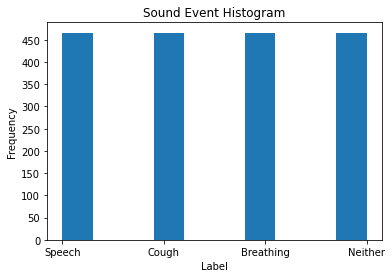

In [95]:
zees = 0
ones = 0
twos = 0
threes = 0
for i in range (0, len(labels)):
  if labels[i] == 0:
    zees += 1
  elif labels[i] == 1:
    ones += 1
  elif labels[i] == 2:
    twos += 1
  elif labels[i] == 3:
    threes  += 1

print('Talking samples:', zees)
print('Coughing samples:', ones)
print('Breathing samples:', twos)
print('Neither samples:', threes)
ax = plt.figure().gca();
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));
ax.hist(labels);
plt.title('Sound Event Histogram');
plt.ylabel('Frequency');
plt.xlabel('Label');
plt.xticks(np.arange(4), ['Speech', 'Cough', 'Breathing', 'Neither']);



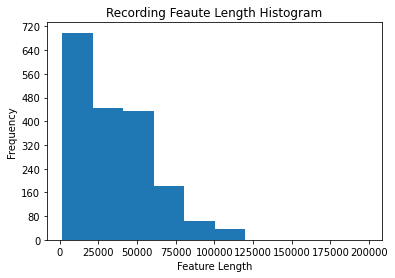

In [96]:
lengths = np.zeros(len(f))
for i in range (0, len(f)):
  lengths[i] = (f[i]).shape[1]

ax = plt.figure().gca();
ax.xaxis.set_major_locator(MaxNLocator(integer=True));
ax.yaxis.set_major_locator(MaxNLocator(integer=True));
ax.hist(lengths);
plt.title('Recording Feaute Length Histogram');
plt.ylabel('Frequency');
plt.xlabel('Feature Length');


so lets choose a duration of samples to standardize each recording/row 

In [97]:
samples_needed = 50000
# samples_needed = 25000
features = sample_extractor(f, samples_needed)

1350 data rows were padded


In [111]:
imp = SimpleImputer(strategy="most_frequent")
scaler = StandardScaler()
features = imp.fit_transform(features)
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [112]:
features.shape

(1863, 50000)

In [113]:
labels.shape

(1863,)

In [114]:
def lda_run(classifier, name, X=features, y= np.reshape(labels,(len(labels), -1)), show_plots=0):
  # X = features
  # y = np.reshape(covid,(len(covid), -1))
  # classifier = MLP
  # show_plots = 1
  # name = 'MLP'
  folds = 10
  time0 = np.zeros(folds)
  k_fold = IterativeStratification(n_splits=folds, order=1)
  fold_num = 1
  correct = 0
  all_truths = np.array([])
  all_results = np.array([])
  all_testlabels = np.array([])
  pos_probs = np.array([])
  acc = np.zeros(folds)
  # lda = LDA(n_components=4)
  for train, test in k_fold.split(X, y):
      ######### FIT ##################
      start_time = time.time()
      
      # lda_train = pd.DataFrame(lda.fit_transform(X[train], y[train]))
      # classifier.fit(lda_train, y[train])
      classifier.fit(X[train], y[train])
      end_time = time.time()
      time0[fold_num-1] = end_time-start_time
      print(int(time0[fold_num-1]), 'secs to fit', name)
      ######################################
      # lda_test = pd.DataFrame(lda.transform(X[test]))
      # result = classifier.predict(lda_test)
      result = classifier.predict(X[test])
      print('########################### Fold', fold_num, "###########################" )
      # print('Prediction Shape:' , result.shape)
      # print('Test Labels Shape:' , y[test].shape)
      for i in range(len(result)):
        truth = y[test]
        if truth[i] == result[i]:
          correct += 1
      print('Correct Predictions:', correct)
      print('Total Labels to Predict:', len(result))
      acc[fold_num - 1] = correct/len(result)
      correct = 0
      fold_num += 1

      if show_plots==1:
        confusion_matrix = pd.crosstab(np.ravel(y[test]), np.ravel(result), rownames=['Actual'], colnames=['Predicted'])
        sn.heatmap(confusion_matrix, annot=True)
        plt.show()

      all_truths = np.append(all_truths, truth)
      # print("All truths:", all_truths.shape)
      all_results = np.append(all_results, result)
      # print("All results:", all_results.shape)
      yhat = classifier.predict_proba(X[test])
      pos_probs= np.append(pos_probs, yhat[:, 1])
      all_testlabels = np.append(all_testlabels, y[test])
  return all_truths, all_results, time0

In [115]:
bestModel = {'alpha': .001, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l1'}
sgd = linear_model.SGDClassifier(alpha=bestModel['alpha'], loss = bestModel['loss'], penalty=bestModel['penalty'], shuffle = True)
dtree = DecisionTreeClassifier(max_depth=100)
kn = KNeighborsClassifier(n_neighbors=10)
svc = SVC(gamma=.0001, kernel='rbf', probability=True)
rf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1)
nb = GaussianNB()
logreg = LogisticRegression(solver='lbfgs')

In [116]:
max_iter = 10000
alpha = .001
MLP = MLPClassifier(alpha= alpha, max_iter= max_iter)

35 secs to fit log reg LDA
########################### Fold 1 ###########################
Correct Predictions: 142
Total Labels to Predict: 187
43 secs to fit log reg LDA
########################### Fold 2 ###########################
Correct Predictions: 144
Total Labels to Predict: 187
34 secs to fit log reg LDA
########################### Fold 3 ###########################
Correct Predictions: 142
Total Labels to Predict: 185
34 secs to fit log reg LDA
########################### Fold 4 ###########################
Correct Predictions: 146
Total Labels to Predict: 186
30 secs to fit log reg LDA
########################### Fold 5 ###########################
Correct Predictions: 147
Total Labels to Predict: 187
33 secs to fit log reg LDA
########################### Fold 6 ###########################
Correct Predictions: 145
Total Labels to Predict: 187
35 secs to fit log reg LDA
########################### Fold 7 ###########################
Correct Predictions: 151
Total Labels to Predi

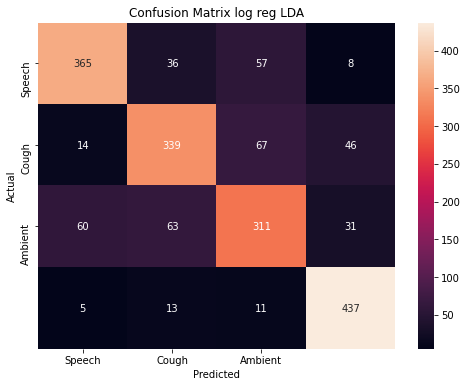

Average fit time: 34.507840275764465 secs


0.7793880837359098

In [117]:
all_truths, all_results, time0  = lda_run(logreg, "log reg LDA", features)
conmat(all_truths, all_results, time0, "log reg LDA")
accuracy_score(all_truths, all_results)

In [ ]:
all_truths, all_results, time0  = lda_run(MLP, "MLP LDA", features)
conmat(all_truths, all_results, time0, "MLP LDA")
accuracy_score(all_truths, all_results)

In [ ]:
all_truths, all_results, time0  = lda_run(sgd, "sgd LDA", features)
conmat(all_truths, all_results, time0, "sgd LDA")
accuracy_score(all_truths, all_results)

In [ ]:
all_truths, all_results, time0  = lda_run(dtree, "dtree LDA", features)
conmat(all_truths, all_results, time0, "dtree LDA")
accuracy_score(all_truths, all_results)

In [ ]:
all_truths, all_results, time0  = lda_run(kn, "KN LDA", features)
conmat(all_truths, all_results, time0, "KN LDA")
accuracy_score(all_truths, all_results)

In [ ]:
all_truths, all_results, time0  = lda_run(logreg, "svc LDA", features)
conmat(all_truths, all_results, time0, "svc LDA")
accuracy_score(all_truths, all_results)

0 secs to fit rf LDA
########################### Fold 1 ###########################
Correct Predictions: 141
Total Labels to Predict: 187
0 secs to fit rf LDA
########################### Fold 2 ###########################
Correct Predictions: 138
Total Labels to Predict: 187
0 secs to fit rf LDA
########################### Fold 3 ###########################
Correct Predictions: 145
Total Labels to Predict: 187
0 secs to fit rf LDA
########################### Fold 4 ###########################
Correct Predictions: 148
Total Labels to Predict: 187
0 secs to fit rf LDA
########################### Fold 5 ###########################
Correct Predictions: 122
Total Labels to Predict: 180
0 secs to fit rf LDA
########################### Fold 6 ###########################
Correct Predictions: 144
Total Labels to Predict: 187
0 secs to fit rf LDA
########################### Fold 7 ###########################
Correct Predictions: 144
Total Labels to Predict: 187
0 secs to fit rf LDA
#############

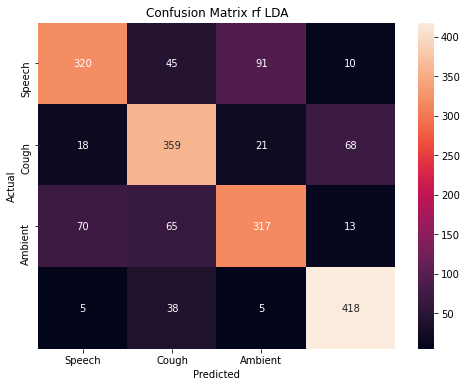

Average fit time: 0.341552209854126 secs


0.758990874932904

In [118]:
all_truths, all_results, time0  = lda_run(rf, "rf LDA", features)
conmat(all_truths, all_results, time0, "rf LDA")
accuracy_score(all_truths, all_results)

In [ ]:
all_truths, all_results, time0  = lda_run(nb, "nb LDA", features)
conmat(all_truths, all_results, time0, "nb LDA")
accuracy_score(all_truths, all_results)

# **Sound Event Detection**

45.916356563568115 secs to fit LDA


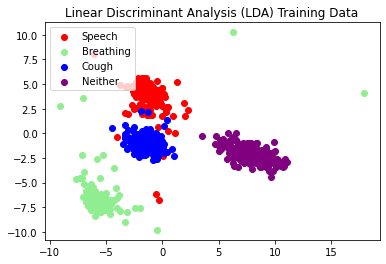

In [23]:
X = features
y = np.reshape(labels,(len(labels), -1))
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.05, random_state=6)
lda = LDA(n_components=4)

######### FIT ##################
start_time = time.time()

lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

end_time = time.time()
time_lda = end_time-start_time
print(time_lda, 'secs to fit LDA')
######################################
trainy = y
# Plot all three series (TRAINING DATA)
plt.scatter(lda_transformed[trainy==0][0], lda_transformed[trainy==0][1], label='Speech', c='red')
plt.scatter(lda_transformed[trainy==2][0], lda_transformed[trainy==2][1], label='Breathing', c='lightgreen')
plt.scatter(lda_transformed[trainy==1][0], lda_transformed[trainy==1][1], label='Cough', c='blue')
plt.scatter(lda_transformed[trainy==3][0], lda_transformed[trainy==3][1], label='Neither', c='purple')

# Display legend and show plot
plt.legend(loc=2)
plt.title('Linear Discriminant Analysis (LDA) Training Data')
plt.show()

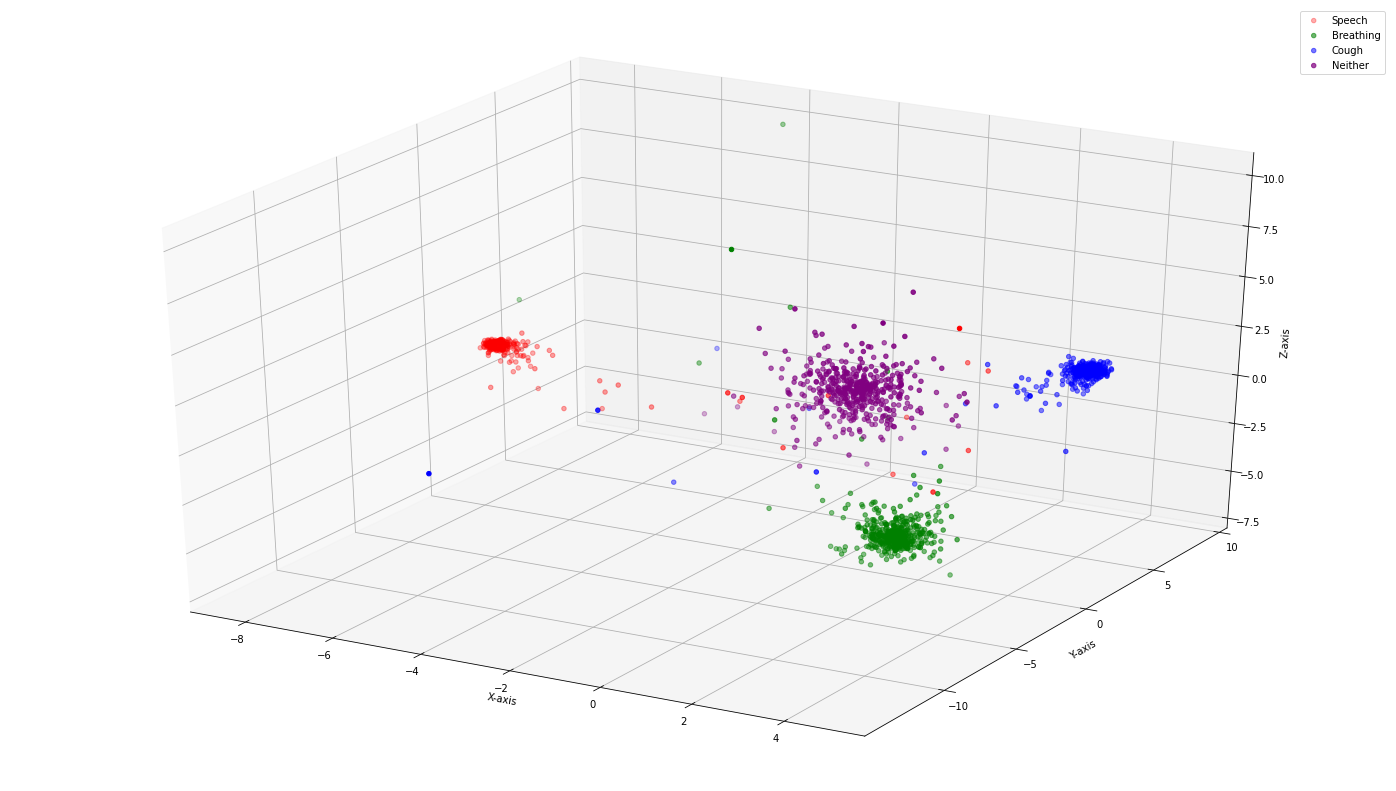

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

cl = trainy.flatten()

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = lda_transformed[:][0]
sequence_containing_y_vals = lda_transformed[:][1]
sequence_containing_z_vals = lda_transformed[:][2]

ax.scatter(sequence_containing_x_vals[cl==0], sequence_containing_y_vals[cl==0],sequence_containing_z_vals[cl==0], label='Speech', c='red')
ax.scatter(sequence_containing_x_vals[cl==1], sequence_containing_y_vals[cl==1],sequence_containing_z_vals[cl==1], label='Breathing', c='green')
ax.scatter(sequence_containing_x_vals[cl==2], sequence_containing_y_vals[cl==2],sequence_containing_z_vals[cl==2], label='Cough', c='blue')
ax.scatter(sequence_containing_x_vals[cl==3], sequence_containing_y_vals[cl==3],sequence_containing_z_vals[cl==3], label='Neither', c='purple')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
# pyplot.show()
# rotate the axes and update
# ax.view_init(280);
plt.draw()
plt.legend()

fig.set_size_inches(19.2, 10.8)
plt.savefig("sample.png", dpi=100)

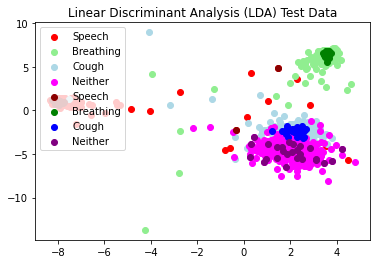

In [ ]:
# Plot all three series (TRAINING DATA)
plt.scatter(lda_transformed[trainy==0][0], lda_transformed[trainy==0][1], label='Speech', c='red')
plt.scatter(lda_transformed[trainy==2][0], lda_transformed[trainy==2][1], label='Breathing', c='lightgreen')
plt.scatter(lda_transformed[trainy==1][0], lda_transformed[trainy==1][1], label='Cough', c='lightblue')
plt.scatter(lda_transformed[trainy==3][0], lda_transformed[trainy==3][1], label='Neither', c='magenta')
# Display legend and show plot
plt.legend(loc=2)
plt.title('Linear Discriminant Analysis (LDA) Training Data')
# plt.show()

# # Plotting the Test Data via transforming the Test Data with Labels
# lda_test = pd.DataFrame(lda.fit_transform(testX, testy))
# # Plot all three series (TEST DATA)
# plt.scatter(lda_test[testy==0][0], lda_test[testy==0][1], label='Speech', c='darkred')
# plt.scatter(lda_test[testy==2][0], lda_test[testy==2][1], label='Breathing', c='green')
# plt.scatter(lda_test[testy==1][0], lda_test[testy==1][1], label='Cough', c='blue')
# plt.scatter(lda_test[testy==3][0], lda_test[testy==3][1], label='Neither', c='purple')

# Plotting the Test Data via transforming the Test Data without Labels
lda_t = pd.DataFrame(lda.transform(testX))
lda_t.shape
plt.scatter(lda_t[testy==0][0], lda_t[testy==0][1], label='Speech', c='darkred')
plt.scatter(lda_t[testy==2][0], lda_t[testy==2][1], label='Breathing', c='green')
plt.scatter(lda_t[testy==1][0], lda_t[testy==1][1], label='Cough', c='blue')
plt.scatter(lda_t[testy==3][0], lda_t[testy==3][1], label='Neither', c='purple')
# Display legend and show plot
plt.legend(loc=2)
plt.title('Linear Discriminant Analysis (LDA) Test Data')
plt.show()

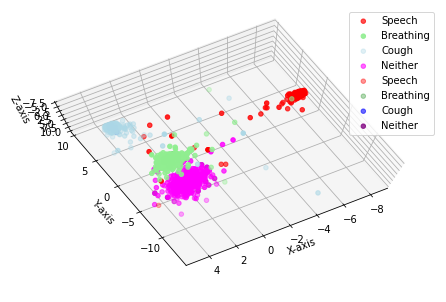

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

cl = trainy.flatten()


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = lda_transformed[:][0]
sequence_containing_y_vals = lda_transformed[:][1]
sequence_containing_z_vals = lda_transformed[:][2]

ax.scatter(sequence_containing_x_vals[cl==0], sequence_containing_y_vals[cl==0],sequence_containing_z_vals[cl==0], label='Speech', c='red')
ax.scatter(sequence_containing_x_vals[cl==1], sequence_containing_y_vals[cl==1],sequence_containing_z_vals[cl==1], label='Breathing', c='lightgreen')
ax.scatter(sequence_containing_x_vals[cl==2], sequence_containing_y_vals[cl==2],sequence_containing_z_vals[cl==2], label='Cough', c='lightblue')
ax.scatter(sequence_containing_x_vals[cl==3], sequence_containing_y_vals[cl==3],sequence_containing_z_vals[cl==3], label='Neither', c='magenta')

cl = testy.flatten()
sequence_containing_x_vals = lda_t[:][0]
sequence_containing_y_vals = lda_t[:][1]
sequence_containing_z_vals = lda_t[:][2]

ax.scatter(sequence_containing_x_vals[cl==0], sequence_containing_y_vals[cl==0],sequence_containing_z_vals[cl==0], label='Speech', c='red')
ax.scatter(sequence_containing_x_vals[cl==1], sequence_containing_y_vals[cl==1],sequence_containing_z_vals[cl==1], label='Breathing', c='green')
ax.scatter(sequence_containing_x_vals[cl==2], sequence_containing_y_vals[cl==2],sequence_containing_z_vals[cl==2], label='Cough', c='blue')
ax.scatter(sequence_containing_x_vals[cl==3], sequence_containing_y_vals[cl==3],sequence_containing_z_vals[cl==3], label='Neither', c='purple')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
# pyplot.show()
# rotate the axes and update
ax.view_init(280);
plt.draw()
plt.legend()

0.6808510638297872


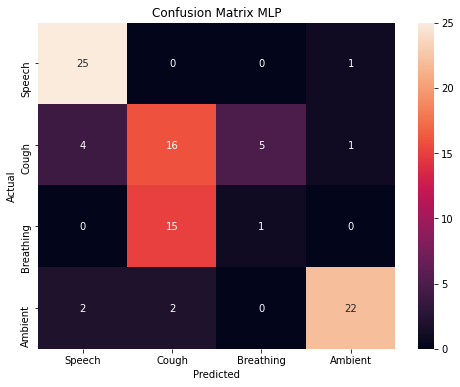

Average fit time: 0.0 secs


In [ ]:
lda_t = pd.DataFrame(lda.fit_transform(testX, testy))
time0 = 0
MLP.fit(lda_transformed, trainy)
preds = MLP.predict(lda_t)
print(accuracy_score(preds, testy))
conmat(testy, preds, time0, name="MLP")

In [ ]:
i = 0
scores = []

In [ ]:
solvers = ['saga']
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# penalty = ['l1', 'l2', 'elasticnet', 'none']
penalty = ['l2']
# penalty = ['l2', 'none']
for i in range (0, len(solvers)):
  for j in range (0, len(penalty)):
    logreg = LogisticRegression(solver=solvers[i], penalty = penalty[j])
    print(solvers[i], penalty[j])
    logreg.fit(lda_transformed, trainy)
    scores.append(accuracy_score(logreg.predict(lda_t), testy))
    # print(scores)
print(np.max(scores))

newton-cg l2
lbfgs l2
liblinear l2
sag l2
saga l2
0.9042553191489362


In [ ]:
kn.fit(lda_transformed, trainy)
accuracy_score(kn.predict(lda_t), testy)

0.851063829787234

In [ ]:
dtree.fit(lda_transformed, trainy)
accuracy_score(dtree.predict(lda_t), testy)

0.6382978723404256

In [ ]:
# svc.fit(trainX, trainy)
# accuracy_score(svc.predict(testX), testy)

In [ ]:
rf.fit(lda_transformed, trainy)
accuracy_score(rf.predict(lda_t), testy)

0.5425531914893617

In [ ]:
nb.fit(lda_transformed, trainy)
accuracy_score(nb.predict(lda_t), testy)

0.8617021276595744

In [24]:
def cv_run(classifier, name, X=features, y= np.reshape(labels,(len(labels), -1)), show_plots=0):
  folds = 10
  time0 = np.zeros(folds)
  k_fold = IterativeStratification(n_splits=folds, order=1)
  fold_num = 1
  correct = 0
  all_truths = np.array([])
  all_results = np.array([])
  all_testlabels = np.array([])
  pos_probs = np.array([])
  acc = np.zeros(folds)
  for train, test in k_fold.split(X, y):
      ######### FIT ##################
      start_time = time.time()

      classifier.fit(X[train], y[train])

      end_time = time.time()
      time0[fold_num-1] = end_time-start_time
      print(int(time0[fold_num-1]), 'secs to fit', name)
      ######################################
      result = classifier.predict(X[test])
      print('########################### Fold', fold_num, "###########################" )
      # print('Prediction Shape:' , result.shape)
      # print('Test Labels Shape:' , y[test].shape)
      for i in range(len(result)):
        truth = y[test]
        if truth[i] == result[i]:
          correct += 1
      print('Correct Predictions:', correct)
      print('Total Labels to Predict:', len(result))
      acc[fold_num - 1] = correct/len(result)
      correct = 0
      fold_num += 1

      if show_plots==1:
        fig, ax = plt.subplots(figsize=(8,6))
        confusion_matrix = pd.crosstab(np.ravel(y[test]), np.ravel(result), rownames=['Actual'], colnames=['Predicted'])
        sn.heatmap(confusion_matrix, annot=True, yticklabels=['Speech', 'Cough', 'Breathing', 'Ambient'], xticklabels=['Speech', 'Cough', 'Breathing', 'Ambient'])
        plt.show()

      all_truths = np.append(all_truths, truth)
      # print("All truths:", all_truths.shape)
      all_results = np.append(all_results, result)
      # print("All results:", all_results.shape)
      yhat = classifier.predict_proba(X[test])
      pos_probs= np.append(pos_probs, yhat[:, 1])
      all_testlabels = np.append(all_testlabels, y[test])
  return all_truths, all_results, time0

# **Sound Event Detection**

In [25]:
bestModel = {'alpha': .0001, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l1'}
sgd = linear_model.SGDClassifier(alpha=bestModel['alpha'], loss = bestModel['loss'], penalty=bestModel['penalty'], shuffle = True)
dtree = DecisionTreeClassifier(max_depth=20)
kn = KNeighborsClassifier(n_neighbors=7)
svc = SVC(gamma=.0001, kernel='rbf', probability=True)
rf = RandomForestClassifier(max_depth=10, n_estimators=20)
nb = GaussianNB()


In [26]:
max_iter = 10000
alpha = .0001
MLP = MLPClassifier(alpha= alpha, max_iter= max_iter)

In [27]:
logreg = LogisticRegression(solver='lbfgs')

42.143868923187256 secs to fit LDA


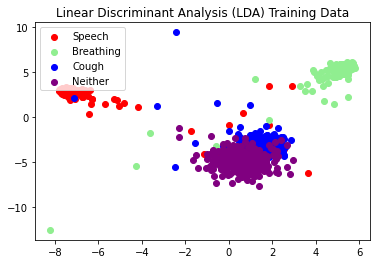

In [119]:
X = features
y = np.reshape(labels,(len(labels), -1))
# X = equalX
# y = equaly
np.argwhere(y == 0)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1, random_state=4)
lda = LDA(n_components=4)

######### FIT ##################
start_time = time.time()

lda_transformed = pd.DataFrame(lda.fit_transform(trainX, trainy))

end_time = time.time()
time_lda = end_time-start_time
print(time_lda, 'secs to fit LDA')
######################################

# Plot all three series (TRAINING DATA)
plt.scatter(lda_transformed[trainy==0][0], lda_transformed[trainy==0][1], label='Speech', c='red')
plt.scatter(lda_transformed[trainy==2][0], lda_transformed[trainy==2][1], label='Breathing', c='lightgreen')
plt.scatter(lda_transformed[trainy==1][0], lda_transformed[trainy==1][1], label='Cough', c='blue')
plt.scatter(lda_transformed[trainy==3][0], lda_transformed[trainy==3][1], label='Neither', c='purple')

# Display legend and show plot
plt.legend(loc=2)
plt.title('Linear Discriminant Analysis (LDA) Training Data')
plt.show()

In [103]:
def one_class(soundnum, X, y):
  sound = np.where(y != soundnum)
  X = X[sound, :]
  y = y[sound]
  return X[0], y

In [126]:
X1, y1 = one_class(2, X, y)
X1.shape

(1398, 50000)

In [31]:
X1 = X1[0]

In [127]:
#########################################################
from sklearn.decomposition import PCA
X = features
y = np.reshape(labels,(len(labels), -1))
# X = equalX
# y = equaly
trainX, testX, trainy, testy = train_test_split(X1, y1, test_size=0.15, random_state=4)
lda = PCA(n_components=4)

######### FIT ##################
start_time = time.time()

lda_transformed = pd.DataFrame(lda.fit_transform(trainX))

end_time = time.time()
time_lda = end_time-start_time
print(time_lda, 'secs to fit LDA')
######################################

# # Plot all three series (TRAINING DATA)
# plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Speech', c='red')
# plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Breathing', c='lightgreen')
# plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Cough', c='blue')
# plt.scatter(lda_transformed[y==3][0], lda_transformed[y==3][1], label='Neither', c='purple')

# # Display legend and show plot
# plt.legend(loc=2)
# plt.title('Principal Component Analysis (PCA)')
# plt.show()

3.9581315517425537 secs to fit LDA


In [128]:
lda_t = pd.DataFrame(lda.transform(testX))

LDA MLP: 0.7142857142857143


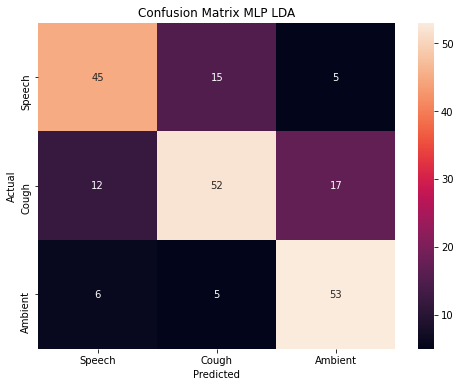

Average fit time: 0.3537473678588867 secs
MLP: 0.9047619047619048


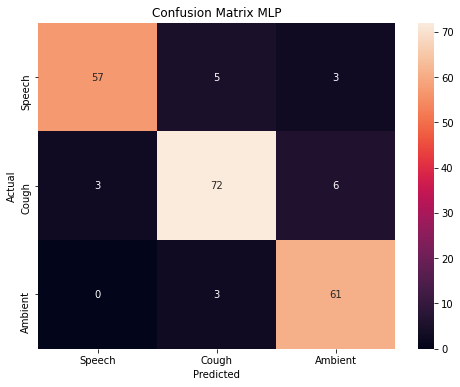

Average fit time: 35.35163760185242 secs


In [129]:
start_time = time.time()
MLP.fit(lda_transformed, trainy)
end_time = time.time()
time0 = end_time-start_time
preds = MLP.predict(lda_t)
print('LDA MLP:', accuracy_score(preds, testy))
conmat(testy, preds, time0, name="MLP LDA")

start_time = time.time()
MLP.fit(trainX, trainy)
end_time = time.time()
time0 = end_time-start_time
preds2 = MLP.predict(testX)
print('MLP:', accuracy_score(preds2, testy))
conmat(testy, preds2, time0, name="MLP")

In [107]:
logreg.fit(lda_transformed, trainy)
print('LDA Logreg:', accuracy_score(logreg.predict(lda_t), testy))
logreg.fit(trainX, trainy)
print('Logreg:', accuracy_score(logreg.predict(testX), testy))


LDA Logreg: 0.5642201834862385
Logreg: 0.4036697247706422


LDA Logreg: 0.5642201834862385


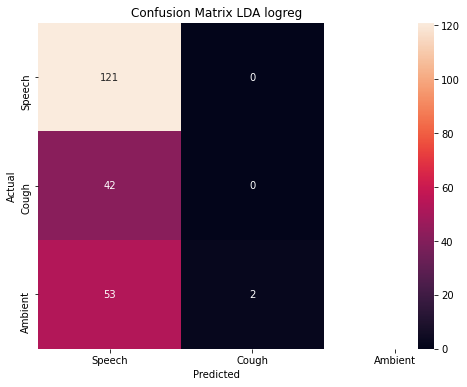

Average fit time: 0.0675356388092041 secs
logreg: 0.4036697247706422


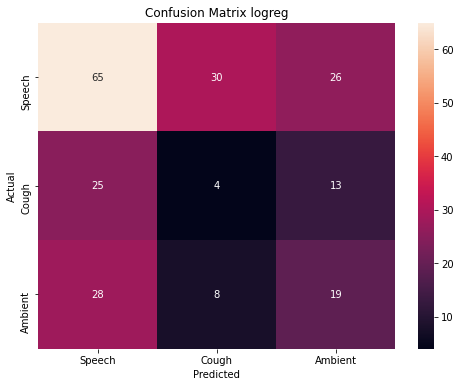

Average fit time: 18.717838764190674 secs


In [108]:
start_time = time.time()
logreg.fit(lda_transformed, trainy)
end_time = time.time()
time0 = end_time-start_time
preds = logreg.predict(lda_t)
print('LDA Logreg:', accuracy_score(preds, testy))
conmat(testy, preds, time0, name="LDA logreg")

start_time = time.time()
logreg.fit(trainX, trainy)
end_time = time.time()
time0 = end_time-start_time
preds2 = logreg.predict(testX)
print('logreg:', accuracy_score(preds2, testy))
conmat(testy, preds2, time0, name="logreg")

LDA KN: 0.6928571428571428


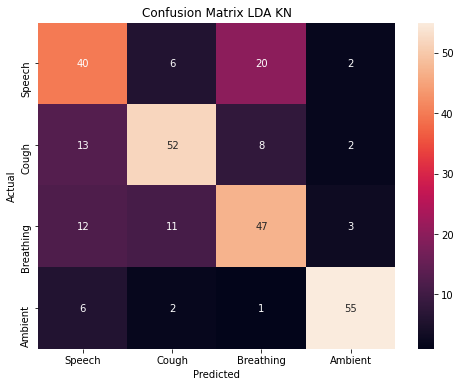

Average fit time: 0.0028684139251708984 secs
KN: 0.6107142857142858


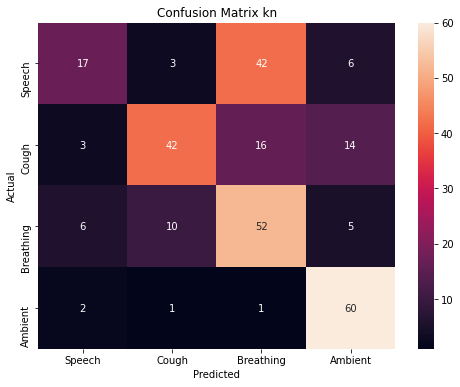

Average fit time: 7.352052450180054 secs


In [ ]:
start_time = time.time()
kn.fit(lda_transformed, trainy)
end_time = time.time()
time0 = end_time-start_time
preds = kn.predict(lda_t)
print('LDA KN:', accuracy_score(preds, testy))
conmat(testy, preds, time0, name="LDA KN")

start_time = time.time()
kn.fit(trainX, trainy)
end_time = time.time()
time0 = end_time-start_time
preds2 = kn.predict(testX)
print('KN:', accuracy_score(preds2, testy))
conmat(testy, preds2, time0, name="kn")

LDA Dtree: 0.5964285714285714


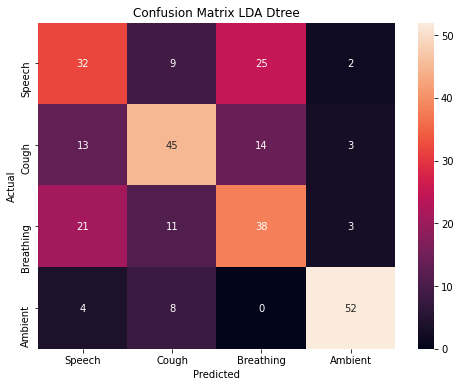

Average fit time: 0.01072835922241211 secs
dtree: 0.7142857142857143


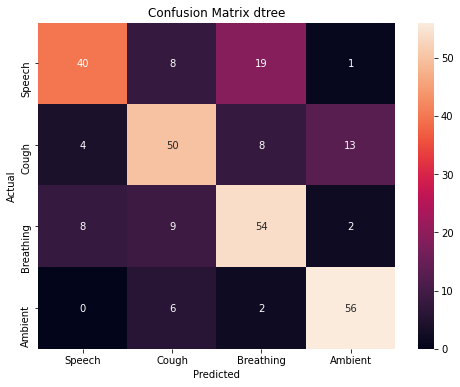

Average fit time: 67.13708353042603 secs


In [ ]:
start_time = time.time()
dtree.fit(lda_transformed, trainy)
end_time = time.time()
time0 = end_time-start_time
preds = dtree.predict(lda_t)
print('LDA Dtree:', accuracy_score(preds, testy))
conmat(testy, preds, time0, name="LDA Dtree")

start_time = time.time()
dtree.fit(trainX, trainy)
end_time = time.time()
time0 = end_time-start_time
preds2 = dtree.predict(testX)
print('dtree:', accuracy_score(preds2, testy))
conmat(testy, preds2, time0, name="dtree")

In [ ]:
# start_time = time.time()
# svc.fit(lda_transformed, trainy)
# end_time = time.time()
# time0 = end_time-start_time
# preds = svc.predict(lda_t)
# print('LDA SVC:', accuracy_score(preds, testy))
# conmat(testy, preds, time0, name="LDA SVC")

# start_time = time.time()
# svc.fit(trainX, trainy)
# end_time = time.time()
# time0 = end_time-start_time
# preds2 = svc.predict(testX)
# print('svc:', accuracy_score(preds2, testy))
# conmat(testy, preds2, time0, name="svc")

RF: 0.9


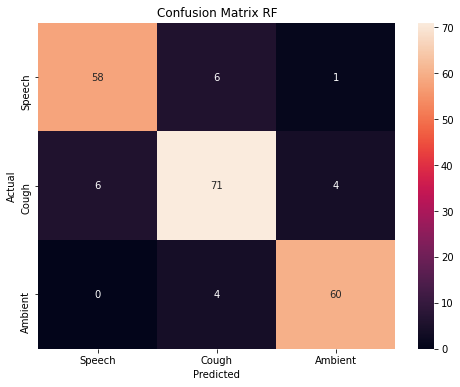

Average fit time: 15.296631336212158 secs
             precision    recall  f1-score  support   pred
0             0.906250  0.892308  0.899225     65.0   64.0
1             0.876543  0.876543  0.876543     81.0   81.0
3             0.923077  0.937500  0.930233     64.0   65.0
avg / total   0.899920  0.900000  0.899926    210.0  210.0
RF: 0.9047619047619048


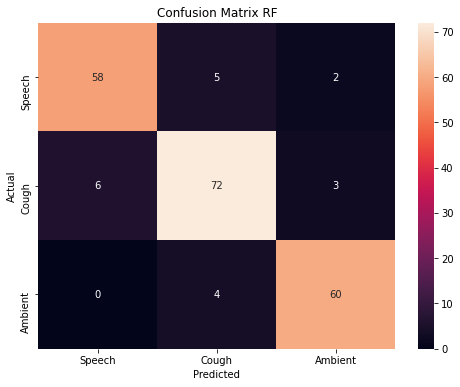

Average fit time: 16.99972414970398 secs
             precision    recall  f1-score  support   pred
0             0.906250  0.892308  0.899225     65.0   64.0
1             0.888889  0.888889  0.888889     81.0   81.0
3             0.923077  0.937500  0.930233     64.0   65.0
avg / total   0.904682  0.904762  0.904688    210.0  210.0
RF: 0.919047619047619


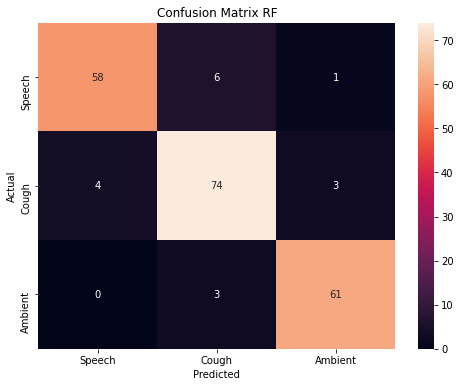

Average fit time: 15.486584663391113 secs
             precision    recall  f1-score  support   pred
0             0.935484  0.892308  0.913386     65.0   62.0
1             0.891566  0.913580  0.902439     81.0   83.0
3             0.938462  0.953125  0.945736     64.0   65.0
avg / total   0.919452  0.919048  0.919023    210.0  210.0
RF: 0.8952380952380953


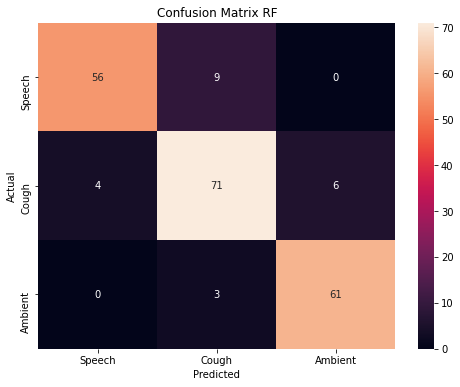

Average fit time: 15.104866027832031 secs
             precision    recall  f1-score  support   pred
0             0.933333  0.861538  0.896000     65.0   60.0
1             0.855422  0.876543  0.865854     81.0   83.0
3             0.910448  0.953125  0.931298     64.0   67.0
avg / total   0.896307  0.895238  0.895130    210.0  210.0
RF: 0.9


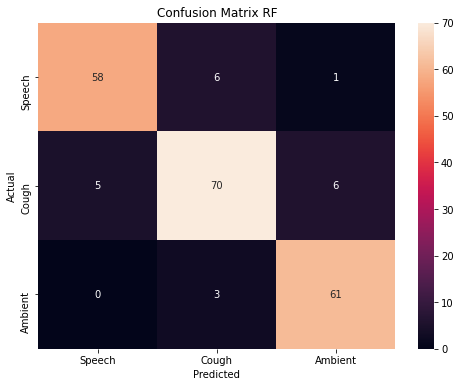

Average fit time: 15.41263461112976 secs
             precision    recall  f1-score  support   pred
0             0.920635  0.892308  0.906250     65.0   63.0
1             0.886076  0.864198  0.875000     81.0   79.0
3             0.897059  0.953125  0.924242     64.0   68.0
avg / total   0.900120  0.900000  0.899680    210.0  210.0
RF: 0.9


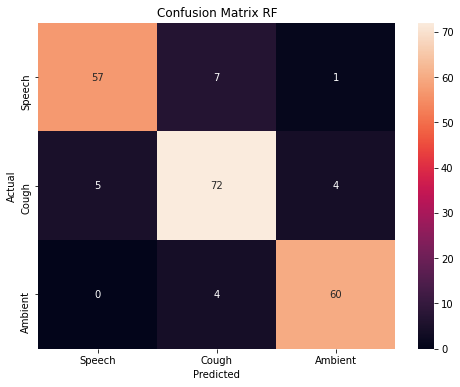

Average fit time: 14.86847972869873 secs
             precision    recall  f1-score  support   pred
0             0.919355  0.876923  0.897638     65.0   62.0
1             0.867470  0.888889  0.878049     81.0   83.0
3             0.923077  0.937500  0.930233     64.0   65.0
avg / total   0.900476  0.900000  0.900016    210.0  210.0
RF: 0.9095238095238095


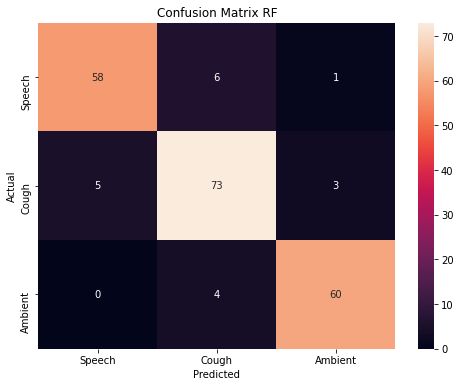

Average fit time: 15.29179835319519 secs
             precision    recall  f1-score  support   pred
0             0.920635  0.892308  0.906250     65.0   63.0
1             0.879518  0.901235  0.890244     81.0   83.0
3             0.937500  0.937500  0.937500     64.0   64.0
avg / total   0.909915  0.909524  0.909600    210.0  210.0
RF: 0.9


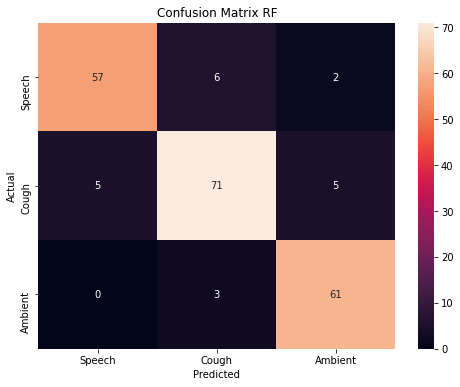

Average fit time: 15.321366310119629 secs
             precision    recall  f1-score  support   pred
0             0.919355  0.876923  0.897638     65.0   62.0
1             0.887500  0.876543  0.881988     81.0   80.0
3             0.897059  0.953125  0.924242     64.0   68.0
avg / total   0.900273  0.900000  0.899709    210.0  210.0
RF: 0.919047619047619


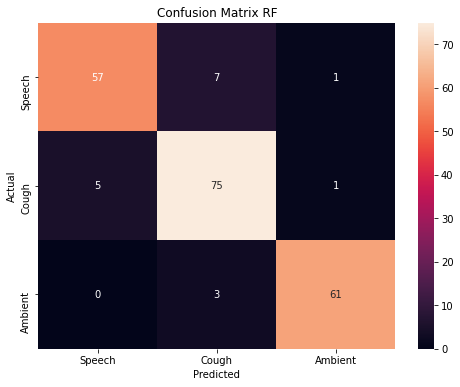

Average fit time: 15.153867483139038 secs
             precision    recall  f1-score  support   pred
0             0.919355  0.876923  0.897638     65.0   62.0
1             0.882353  0.925926  0.903614     81.0   85.0
3             0.968254  0.953125  0.960630     64.0   63.0
avg / total   0.919985  0.919048  0.919141    210.0  210.0
RF: 0.9047619047619048


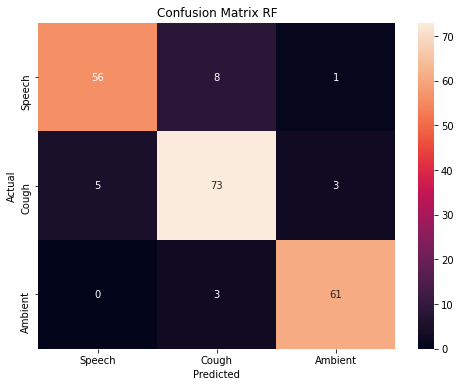

Average fit time: 15.140461206436157 secs
             precision    recall  f1-score  support   pred
0             0.918033  0.861538  0.888889     65.0   61.0
1             0.869048  0.901235  0.884848     81.0   84.0
3             0.938462  0.953125  0.945736     64.0   65.0
avg / total   0.905364  0.904762  0.904655    210.0  210.0


In [130]:
# start_time = time.time()
# rf.fit(lda_transformed, trainy)
# end_time = time.time()
# time0 = end_time-start_time
# preds = rf.predict(lda_t)
# print('LDA RF:', accuracy_score(preds, testy))
# conmat(testy, preds, time0, name="LDA RF")
rf = RandomForestClassifier(max_depth=None, n_estimators=100 )
for i in range (0, 10):
  start_time = time.time()
  rf.fit(trainX, trainy)
  end_time = time.time()
  time0 = end_time-start_time
  preds2 = rf.predict(testX)
  print('RF:', accuracy_score(preds2, testy))
  conmat(testy, preds2, time0, name="RF")
  report_with_auc = class_report(
      y_true=testy, 
      y_pred=preds2)
  print(report_with_auc)

In [ ]:
# fig, ax = plt.subplots(figsize=(8,6))
# plt.title('Confusion Matrix Random Forest')
# confusion_matrix = pd.crosstab(np.ravel(testy), np.ravel(preds2), rownames=['Actual'], colnames=['Predicted'])
# sn.heatmap(confusion_matrix, annot=True, yticklabels=['Speech', 'Cough', 'Breathing', 'Ambient'], xticklabels=['Speech', 'Cough', 'Breathing', 'Ambient'])
# plt.savefig("con_mat.png", dpi=100)

In [ ]:
all_truths, all_results, time0 = cv_run(rf, "RF", X1, y1)
conmat(all_truths, all_results, time0, "RF")
print('########################### Report ###########################')
report_with_auc = class_report(
    y_true=all_truths, 
    y_pred=all_results)
print(report_with_auc)

ValueError: ignored

LDA NB: 0.3107142857142857


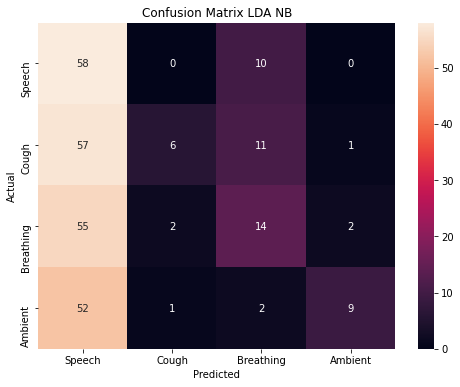

Average fit time: 0.0045049190521240234 secs
NB: 0.6571428571428571


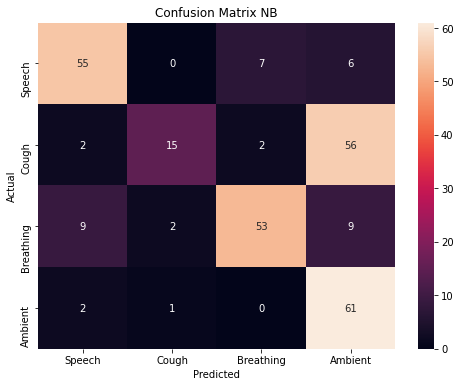

Average fit time: 1.4312777519226074 secs


In [ ]:
start_time = time.time()
nb.fit(lda_transformed, trainy)
end_time = time.time()
time0 = end_time-start_time
preds = nb.predict(lda_t)
print('LDA NB:', accuracy_score(preds, testy))
conmat(testy, preds, time0, name="LDA NB")

start_time = time.time()

nb.fit(trainX, trainy)
end_time = time.time()
time0 = end_time-start_time
preds2 = nb.predict(testX)
print('NB:', accuracy_score(preds2, testy))
conmat(testy, preds2, time0, name="NB")

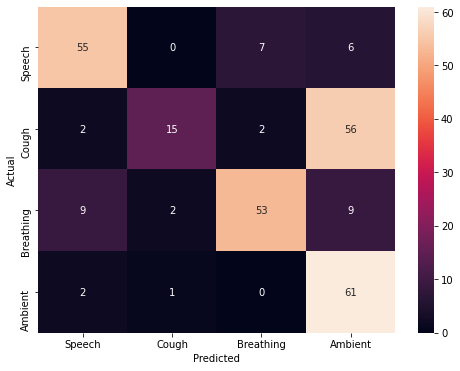

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
confusion_matrix = pd.crosstab(np.ravel(testy), np.ravel(preds2), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, yticklabels=['Speech', 'Cough', 'Breathing', 'Ambient'], xticklabels=['Speech', 'Cough', 'Breathing', 'Ambient'])
plt.show()

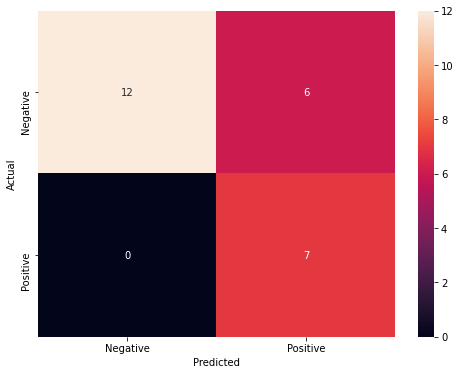

In [138]:
labels= [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
preds = [0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1,0,0]

fig, ax = plt.subplots(figsize=(8,6))
confusion_matrix = pd.crosstab(np.ravel(labels), np.ravel(preds), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, yticklabels=['Negative', 'Positive'], xticklabels=['Negative', 'Positive'])

plt.show()